In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   -------------- ----------------------- 112.6/294.9 kB 297.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 297.7 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 374.1 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 570.1 kB/s eta 0:00:01
   ------------------------


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\vamel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
data=pd.read_csv("cleandata.csv")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36238 entries, 0 to 36237
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36238 non-null  object 
 1   no_of_adults                          36238 non-null  int64  
 2   no_of_children                        36238 non-null  int64  
 3   no_of_weekend_nights                  36238 non-null  int64  
 4   no_of_week_nights                     36238 non-null  int64  
 5   type_of_meal_plan                     36238 non-null  int64  
 6   required_car_parking_space            36238 non-null  int64  
 7   room_type_reserved                    36238 non-null  int64  
 8   lead_time                             36238 non-null  int64  
 9   arrival_year                          36238 non-null  int64  
 10  arrival_month                         36238 non-null  int64  
 11  date           

In [24]:
#categoric to numeric
data = pd.get_dummies(data, drop_first=True)

In [25]:
#log normalize numerical variables
data['no_of_adults'] = np.log(data['no_of_adults'] + 1)
data['no_of_children'] = np.log(data['no_of_children'] + 1)
data['no_of_weekend_nights'] = np.log(data['no_of_weekend_nights'] + 1)
data['no_of_week_nights'] = np.log(data['no_of_week_nights'] + 1)
data['required_car_parking_space'] = np.log(data['required_car_parking_space'] + 1)
data['lead_time'] = np.log(data['lead_time'] + 1)
data['repeated_guest'] = np.log(data['repeated_guest'] + 1)
data['no_of_previous_cancellations'] = np.log(data['no_of_previous_cancellations'] + 1)
data['no_of_previous_bookings_not_canceled'] = np.log(data['no_of_previous_bookings_not_canceled'] + 1)
data['avg_price_per_room'] = np.log(data['avg_price_per_room'] + 1)
data['no_of_special_requests'] = np.log(data['no_of_special_requests'] + 1)

Logistic Regression

In [26]:
y = data["booking_status"]
X = data.drop("booking_status", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [39]:
lr = LogisticRegression()
dc = DecisionTreeClassifier(random_state=24)
rf= RandomForestClassifier(random_state=24)
knn= KNeighborsClassifier()
svm= SVC(random_state=24)

def modelpred(X_train,X_test,y_train,y_test,model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf = confusion_matrix(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred)
    
    print("Model",type(model).__name__)
    print("Accuracy Score of", type(model).__name__,"is :", {acc})
    print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    plt.figure(figsize=(4,2))
    cm=confusion_matrix(y_pred,y_test)
    sns.heatmap(cm,annot=True, fmt='.6g')
    plt.title("Confusion Matrix")
    plt.xlabel("Actual")
    plt.ylabel("Prediction")
    plt.show()


C:\Users\vamel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model LogisticRegression
Accuracy Score of LogisticRegression is : {0.7893671817512877}
Confusion Matrix : 
[[6522  829]
 [1461 2060]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      7351
           1       0.71      0.59      0.64      3521

    accuracy                           0.79     10872
   macro avg       0.77      0.74      0.75     10872
weighted avg       0.78      0.79      0.78     10872



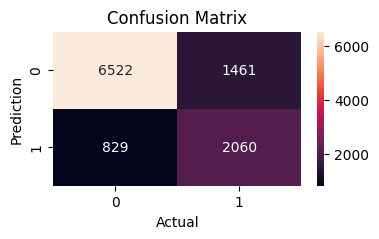

In [40]:
modelpred(X_train , X_test, y_train, y_test,lr)

Model RandomForestClassifier
Accuracy Score of RandomForestClassifier is : {0.8865894039735099}
Confusion Matrix : 
[[6996  355]
 [ 878 2643]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7351
           1       0.88      0.75      0.81      3521

    accuracy                           0.89     10872
   macro avg       0.89      0.85      0.86     10872
weighted avg       0.89      0.89      0.88     10872



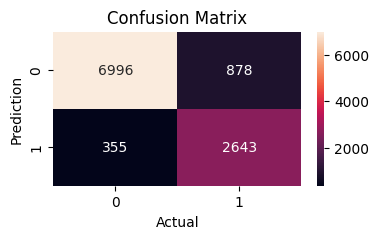

In [41]:
modelpred(X_train , X_test, y_train, y_test,rf)

Model DecisionTreeClassifier
Accuracy Score of DecisionTreeClassifier is : {0.8807027225901398}
Confusion Matrix : 
[[6767  584]
 [ 713 2808]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7351
           1       0.83      0.80      0.81      3521

    accuracy                           0.88     10872
   macro avg       0.87      0.86      0.86     10872
weighted avg       0.88      0.88      0.88     10872



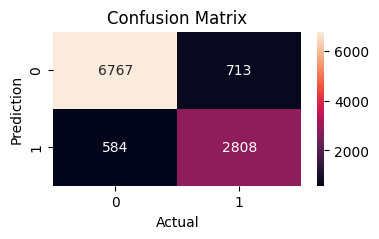

In [42]:
modelpred(X_train , X_test, y_train, y_test,dc)

Model KNeighborsClassifier
Accuracy Score of KNeighborsClassifier is : {0.8092347314201619}
Confusion Matrix : 
[[6447  904]
 [1170 2351]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      7351
           1       0.72      0.67      0.69      3521

    accuracy                           0.81     10872
   macro avg       0.78      0.77      0.78     10872
weighted avg       0.81      0.81      0.81     10872



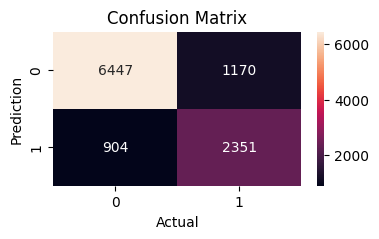

In [43]:
modelpred(X_train , X_test, y_train, y_test,knn)